
# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skojaku/applied-soft-comp/blob/main/notebooks/pytorch.ipynb)


# Introduction to PyTorch

This notebook introduces the fundamentals of PyTorch, focusing on tensor operations and linear algebra concepts. We'll start from the basics and gradually build up to more complex operations.

In [1]:
# First, let's import our required libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

## Introduction to PyTorch Tensors

### What is a Tensor?

![](https://miro.medium.com/v2/resize:fit:880/1*WbLIc4-xIOfHiO2oWzimyA.png)

A tensor is simply a container for numbers. It can be:
- A single number (scalar) - 0-dimensional tensor
- A list of numbers (vector) - 1-dimensional tensor
- A table of numbers (matrix) - 2-dimensional tensor
- A cube of numbers (and beyond!) - 3+ dimensional tensor

Let's create some tensors:

Scalar shape: torch.Size([])
Vector shape: torch.Size([5])
Matrix shape: torch.Size([3, 3])
Cube shape: torch.Size([2, 2, 2])


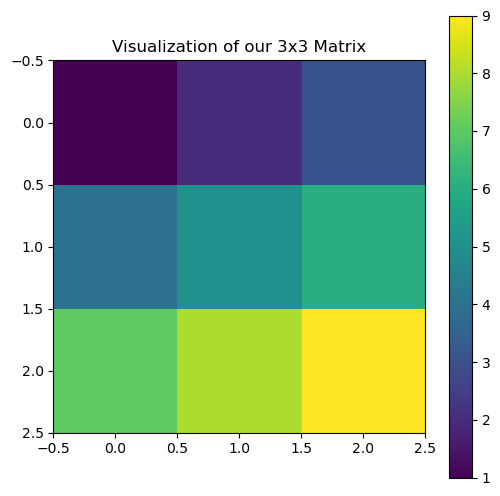

In [2]:
# Creating tensors of different dimensions
scalar = torch.tensor(3.14)
vector = torch.tensor([1, 2, 3, 4, 5])
matrix = torch.tensor([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])
cube = torch.tensor([[[1, 2], [3, 4]],
                    [[5, 6], [7, 8]]])

# Let's print their shapes
print(f"Scalar shape: {scalar.shape}")
print(f"Vector shape: {vector.shape}")
print(f"Matrix shape: {matrix.shape}")
print(f"Cube shape: {cube.shape}")

# Visualize the matrix using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(matrix.numpy(), cmap='viridis')
plt.colorbar()
plt.title('Visualization of our 3x3 Matrix')
plt.show()

### Creating Tensors
PyTorch provides several ways to create tensors:

In [3]:
# Create tensors with specific values
zeros = torch.zeros(3, 4)  # 3x4 tensor of zeros
ones = torch.ones(2, 3)    # 2x3 tensor of ones
random = torch.rand(3, 3)  # 3x3 tensor of random numbers between 0 and 1

# Create tensors with specific ranges
range_tensor = torch.arange(0, 10, step=1)  # Creates [0, 1, 2, ..., 9]
linspace = torch.linspace(0, 1, steps=5)    # Creates 5 evenly spaced points between 0 and 1

print("Zeros tensor:\n", zeros)
print("\nOnes tensor:\n", ones)
print("\nRandom tensor:\n", random)
print("\nRange tensor:", range_tensor)
print("\nLinspace tensor:", linspace)

Zeros tensor:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random tensor:
 tensor([[0.5809, 0.5800, 0.9652],
        [0.5794, 0.4347, 0.5366],
        [0.5666, 0.1796, 0.1876]])

Range tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Linspace tensor: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


### Working with GPU (if available)
PyTorch makes it easy to move computations to GPU:

In [4]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create a tensor and move it to the available device
tensor_on_device = torch.rand(3, 3).to(device)
print(f"Tensor on {device}:\n", tensor_on_device)

Using device: cpu
Tensor on cpu:
 tensor([[0.1275, 0.1860, 0.8166],
        [0.5693, 0.7420, 0.9739],
        [0.6081, 0.3560, 0.4932]])


### Basic Tensor Operations

In [5]:
# Create two tensors
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Addition
print("Addition:\n", a + b)

# Multiplication (element-wise)
print("\nElement-wise multiplication:\n", a * b)

# Matrix multiplication
print("\nMatrix multiplication:\n", torch.matmul(a, b))

# or using the @ operator
print("\nMatrix multiplication (using @):\n", a @ b)

Addition:
 tensor([[ 6,  8],
        [10, 12]])

Element-wise multiplication:
 tensor([[ 5, 12],
        [21, 32]])

Matrix multiplication:
 tensor([[19, 22],
        [43, 50]])

Matrix multiplication (using @):
 tensor([[19, 22],
        [43, 50]])


### Common Tensor Operations and Troubleshooting

In [6]:
try:
    # Create example tensors
    a = torch.tensor([[1, 2], [3, 4]]).to("cpu")
    b = torch.tensor([[5, 6], [7, 8]]).to("cuda")

    # TROUBLESHOOTING TIP: Shape mismatches
    # If you get a RuntimeError about shape mismatch, check tensor shapes:
    print(f"Shape of a: {a.shape}")
    print(f"Shape of b: {b.shape}")
    # Fix by reshaping: tensor.reshape(new_shape) or tensor.view(new_shape)

    # TROUBLESHOOTING TIP: Wrong device
    # If you get a "tensors must be on the same device" error:
    print(f"Device of a: {a.device}")
    print(f"Device of b: {b.device}")
    # Fix by moving tensors to same device: tensor.to(device)

except RuntimeError as e:
    print(f"Runtime Error occurred: {e}")
    print("This may be due to CUDA not being available or tensors being on different devices")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: Torch not compiled with CUDA enabled


### Understanding Broadcasting in Detail
Broadcasting follows these rules:
1. Arrays must have the same number of dimensions, or
2. One array can have fewer dimensions if they match from right to left
3. Each dimension must be equal, or one must be 1

In [7]:
# Examples of valid broadcasting
a = torch.ones(3, 4)
b = torch.ones(4)  # Will be broadcast to (3, 4)
c = a + b  # Works!

# TROUBLESHOOTING TIP: Invalid broadcasting
try:
    d = torch.ones(4, 3)
    result = a + d  # Will fail!
except RuntimeError as e:
    print(f"Error: {e}")
    print("Fix: Ensure shapes are compatible for broadcasting")

Error: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1
Fix: Ensure shapes are compatible for broadcasting


### Memory Management Best Practices

In-place operations modify tensors directly instead of creating new ones.
They are denoted by a trailing underscore (_) in PyTorch.
Examples:
- add_() instead of add()
- mul_() instead of mul()
- sub_() instead of sub()

These operations are memory efficient since they don't create new tensors, making them valuable for large models and datasets where memory is constrained. However, they can't be used with tensors requiring gradients and may cause issues with shared tensors, so they should be implemented carefully, especially in training loops.

In [8]:
# TROUBLESHOOTING TIP: Memory leaks
# Use in-place operations when possible to reduce memory usage
x = torch.ones(1000, 1000)
# Instead of: x = x + 1
x.add_(1)  # In-place addition
# x+=1
# Clear GPU cache if needed
if torch.cuda.is_available():
    torch.cuda.empty_cache()

When working with CUDA tensors, memory isn't automatically released back to the GPU.
torch.cuda.empty_cache() forces unused memory to be released back to the GPU.
This is useful when:
- You get "out of memory" errors
- You've deleted large tensors but memory usage remains high
- Between training runs to ensure a clean GPU state
Note: This only frees unused memory - tensors still in use won't be affected

### Understanding Tensor Memory Layout and Contiguity

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*e92qaBl4Kly5CKzGRNRZIQ.png)

When we create a tensor in PyTorch, it arranges the data sequentially in memory, like books lined up on a shelf. This is called a *contiguous tensor*. We can check if a tensor is contiguous using `is_contiguous()`.

In [9]:
# Creating a contiguous tensor - data is stored sequentially in memory
x = torch.arange(1, 13)  # [1, 2, 3, ..., 12]
print(x.is_contiguous())  # True
print(x)
# We can reshape it while keeping data contiguous
y = x.view(4, 3)
print(y)  # Shows a 4x3 matrix

True
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Xm3ZfWtIn7TUD9lcwhpacg.png)

A `view` is like looking at the same data from a different angle; it doesn't create a new copy but provides a new way to access the same data. Think of it as rearranging books on a shelf without actually moving them. When you change data in a view, it changes the original data because they share the same memory.

In [10]:
x = torch.arange(1, 13)  # Original data
y = x.view(4, 3)        # Viewed as 4x3 matrix
print(x)
print(y)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


Changes in view affect original data.

In [11]:
y[0, 0] = 100
print(x)  # First element changes in both x and y

tensor([100,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12])


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*AnQ2KLhfYmt17ldTKpKvfQ.png)

Strides tell us how many steps to jump to move in each dimension of the tensor. `strides` give us directions: how many elements in the tensor to skip to get to the next row or the next column.


In [12]:
x = torch.arange(1, 13).view(4, 3)
print(x)
print(x.stride())  # (3, 1)
# 3 means: skip 3 elements to move down one row
# 1 means: skip 1 element to move right one column

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
(3, 1)


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*HRWWBxD3H0rkO4r5J64dVg.png)

Sometimes operations like transpose() create non-contiguous tensors, where data isn't stored sequentially anymore. While `view()` only works with contiguous data, `reshape()` can work with both types by creating a new copy when necessary.


In [13]:
x = torch.arange(1, 13).view(4, 3)
y = x.transpose(0, 1)   # Creates non-contiguous tensor
print(y.is_contiguous())  # False

z = x.reshape(2, 6)     # reshape works fine with non-contiguous data
print(z.is_contiguous())  # True

False
True


The key takeaway is that understanding how data is organized in memory helps us choose the right operations and optimize our code's performance. Using `view()` is faster but more restrictive, while `reshape()` is more flexible but might use more memory.

### Understanding Squeeze and Unsqueeze

![](https://i.sstatic.net/9AJJA.png)

It is often necessary to change the dimensions of a tensor to match the expected shape for a particular operation. For example, a tensor with shape (32, 10) might need to be reshaped to (32, 1, 10) for a specific layer. `unsqueeze()` and `squeeze()` are two operations that can help with this.

`unsqueeze()` adds a dimension of size 1 (like turning a 2D sheet into a 3D book with one page). This is useful when you need to match shapes for broadcasting or add batch dimensions.

In [14]:
sequence = torch.randn(32, 10)  # (batch_size, sequence_length)
sequence_expanded = sequence.unsqueeze(1)  # Adds dimension at position 1
# Shape changes from (32, 10) to (32, 1, 10)

print(sequence.shape, sequence_expanded.shape)

torch.Size([32, 10]) torch.Size([32, 1, 10])


`squeeze()` removes all dimensions of size 1 (like flattening a book with one page back into a sheet). This helps clean up tensor shapes after operations that add extra dimensions.

In [15]:
nested = torch.randn(1, 1, 3, 1, 1, 4)  # Tensor with many size-1 dimensions
squeezed = nested.squeeze()  # Removes all size-1 dimensions
# Shape changes from (1, 1, 3, 1, 1, 4) to (3, 4)
squeezed.shape, nested.shape

(torch.Size([3, 4]), torch.Size([1, 1, 3, 1, 1, 4]))

You can specify which dimensions to squeeze or unsqueeze:
- Use positive indices to count from the front
- Use negative indices to count from the back
- Use `dim` parameter to squeeze specific dimensions

In [16]:
tensor = torch.randn(3, 4)
# Both add dimension at the start:
front_expanded = tensor.unsqueeze(0)     # (1, 3, 4)
back_expanded = tensor.unsqueeze(-3)     # (1, 3, 4)

# Squeeze only specific dimensions:
partial = torch.randn(1, 3, 1, 4, 1)
result = partial.squeeze(dim=0)  # Only removes first dimension
# Shape changes from (1, 3, 1, 4, 1) to (3, 1, 4, 1)

The key is to understand that these operations help match tensor shapes for various operations in neural networks, especially when dealing with batches, channels, or preparing data for specific layer requirements.

### Reduction Operations

Reduction operations can collapse all dimensions into a single value, giving you an overall summary of your tensor.

In [17]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)  # 2x3 tensor

total = x.sum()     # Adds all numbers: 21
average = x.mean()  # Averages all numbers: 3.5
total, average
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

You can reduce specific dimensions while keeping others, which is useful for batch operations or feature aggregation:

In [18]:
# Sum along rows (dim=0): combines values vertically
row_sum = x.sum(dim=0)  # Result: [5, 7, 9]
# Each position adds numbers in that column

# Sum along columns (dim=1): combines values horizontally
col_sum = x.sum(dim=1)  # Result: [6, 15]
# Each position adds numbers in that row

row_sum, x.shape

(tensor([5., 7., 9.]), torch.Size([2, 3]))

PyTorch provides methods to find maximum and minimum values, optionally returning their positions:

In [19]:
# Simple max/min across all elements
max_val = x.max()  # Returns 6
min_val = x.min()  # Returns 1

# Getting both values and positions along a dimension
max_vals, max_idx = x.max(dim=1)
# max_vals: highest number in each row [3, 6]
# max_idx: position of highest number [2, 2]
x, max_vals

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([3., 6.]))

These operations are fundamental for many tasks:
- Computing loss functions (like mean squared error)
- Calculating accuracy metrics
- Finding the strongest predictions in classification
- Pooling operations in neural networks

Remember that when using `dim`, think about which dimension you want to "collapse."

### Indexing and Slicing

Just like accessing items in a list, you can pick specific elements from a tensor using indices:

In [20]:
x = torch.tensor([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

first_row = x[0]           # Gets [1, 2, 3, 4]
specific_element = x[1,2]  # Gets 7 (row 1, column 2)

Slicing lets you select ranges of elements using the `start:end` syntax:
Slicing lets you select ranges of elements using the `start:end` syntax:
- `:` means "take everything"
- `0:2` means "take elements from index 0 up to (but not including) 2"
- `-2:` means "take the last two elements"

In [21]:
two_rows = x[:2]        # Takes first two rows
last_columns = x[:,-2:] # Takes last two columns from all rows

You can select elements that meet certain conditions by creating a mask of True/False values:

In [22]:
mask = x > 5            # Creates a boolean mask
big_numbers = x[mask]   # Selects only elements greater than 5
big_numbers
# Results in: [6, 7, 8, 9, 10, 11, 12]

tensor([ 6,  7,  8,  9, 10, 11, 12])

Using arrays of indices to select multiple elements at once:

In [23]:
rows = torch.tensor([0, 2])      # Select first and last rows
cols = torch.tensor([1, 3])      # Select second and last columns
selected = x[(rows, cols)] # Gets specific elements


These indexing methods are important for:
- Selecting specific batches or features in deep learning
- Applying operations to parts of your data
- Filtering data based on conditions
- Efficiently accessing and modifying specific elements

Remember: Unlike NumPy, PyTorch indexing returns views when possible, which means modifications to the slice will affect the original tensor.

## Autograd Mechanics

### Gradient Tracking

A key feature of PyTorch is *autograd*, which is a system for automatic differentiation. When we create a tensor with `requires_grad=True`, PyTorch starts tracking all operations performed on it for automatic differentiation. This is essential for training neural networks.

In [24]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x ** 2  # This operation is tracked
z = y.sum()
z.backward() # This computes the gradient of z with respect to x
x.grad

tensor([2., 4., 6.])

By default, PyTorch accumulates gradients across multiple backward passes. This means if you call `backward()` multiple times, the gradients add up instead of being overwritten.

In [25]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x ** 2  # This operation is tracked

for i in range(2):
    z = y.sum()
    z.backward(retain_graph=True)  # First pass
    print(f"Pass {i+1} gradient:", x.grad)

Pass 1 gradient: tensor([2., 4., 6.])
Pass 2 gradient: tensor([ 4.,  8., 12.])


To reset gradients to zero, use `zero_()`:

In [26]:
x.grad.zero_()  # Resets gradients to zero

tensor([0., 0., 0.])

### Not Tracking Gradients

Sometimes we want to perform operations without tracking gradients (like during evaluation). The `torch.no_grad()` context manager temporarily disables gradient tracking:

In [62]:
with torch.no_grad():
    intermediate = x * 2  # No gradients tracked here
x.grad

This is useful for:
- Saving memory during inference
- Preventing gradients from flowing through certain parts of your model
- Performing operations that don't need gradient tracking

Understanding these concepts is crucial for efficient training of neural networks, especially when dealing with memory constraints or implementing custom training loops.

### Computation Graph

We can take the gradient of a function with respect to multiple variables.

In [63]:
# Creating tensors with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Building a computation graph
z = x**2 + y**3

# Compute gradients
z.backward()

print(f"dz/dx: {x.grad}")  # Should be 2 * x = 4
print(f"dz/dy: {y.grad}")  # Should be 3 * y^2 = 27

dz/dx: 4.0
dz/dy: 27.0


Internally, PyTorch constructs so-called a *computation graph* that represents the operations performed on the tensors.

In [29]:
# !pip install torchviz

In [64]:
# Visualize the computation graph
try:
    from torchviz import make_dot
    import shutil
    if shutil.which('dot') is not None:  # Check if graphviz is installed
        make_dot(z, {'x': x, 'y': y, "z":z}).render("computation_graph", format="png")
    else:
        print("graphviz not installed - skipping visualization")
except ImportError:
    print("torchviz not installed - skipping visualization")

### Higher-Order Derivatives

PyTorch can compute higher-Order derivatives:

In [65]:
# Create a tensor
x = torch.tensor(3.0, requires_grad=True)

# First derivative of x^3
y = x**3
first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]
print(f"First derivative at x=2: {first_derivative}")

# Second derivative
second_derivative = torch.autograd.grad(first_derivative, x)[0]
print(f"Second derivative at x=2: {second_derivative}")

First derivative at x=2: 27.0
Second derivative at x=2: 18.0


### Common Autograd Pitfalls and Solutions

In [66]:
# 1. In-place operations with autograd
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.tensor([3.0, 4.0], requires_grad=True)

# This will raise an error
try:
    x.add_(y)  # In-place addition
    # This is essentially the same as x = x + y, creating a loop in the computation graph
except RuntimeError as e:
    print("Error with in-place operation:", e)

# Correct way
z = x + y  # Create new tensor instead

Error with in-place operation: a leaf Variable that requires grad is being used in an in-place operation.


## Example of Linear Regression

Let us demonstrate all the concepts we have learned so far by implementing a simple linear regression model. Our goal is to find the parameters of a line (y = wx + b) that best fits our data. We generate synthetic data following this pattern with added noise:

In [69]:
X = torch.linspace(-5, 5, 100).reshape(-1, 1)
y = 2 * X + 1 + torch.randn_like(X) * 0.5  # y = 2x + 1 + noise

We will use gradient descent to find the best parameters for our model, which updates the parameter in the direction of the negative gradient. Namely,

$$
\theta_{new} = \theta_{old} - \eta \nabla_{\theta} L(\theta)
$$

where $\eta$ is the learning rate, and $\nabla_{\theta} L(\theta)$ is the gradient of the loss function with respect to the parameters.

We will start with random parameters and iteratively update them to minimize the loss.


In [34]:
# Model parameters with gradient tracking
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
# Training loop showing tensor operations
learning_rate = 0.01
for epoch in range(100):
    y_pred = w * X + b
    loss = ((y_pred - y) ** 2).mean()
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

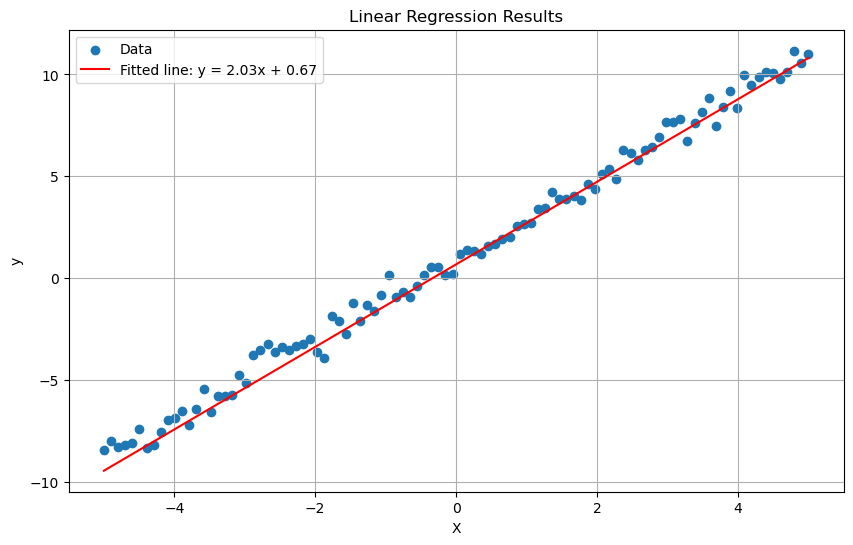

In [70]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Data')
plt.plot(X.detach().numpy(), (w * X + b).detach().numpy(), 'r', label=f'Fitted line: y = {w.item():.2f}x + {b.item():.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.grid(True)
plt.show()


This code showcases key PyTorch concepts for efficient tensor operations and gradient handling. Tensor operations are vectorized for speed, while `requires_grad=True` enables automatic differentiation. The `with torch.no_grad()` context prevents unnecessary gradient tracking during updates, in-place operations minimize memory usage, and explicit gradient zeroing ensures correct parameter updates across training iterations.

# Neural Network Basics

PyTorch offers a high-level interface for building neural networks, which is built on top of the tensor operations we have learned so far. We will learn how to build neural networks using this interface.

## Linear Layer

A linear layer (also called a fully connected or dense layer) performs the operation: y = Wx + b

In [71]:
import torch.nn as nn

# Create a linear layer
linear = nn.Linear(in_features=2, out_features=3)

# Input tensor
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Forward pass
y = linear(x)

print("Input shape:", x.shape)
print("Output shape:", y.shape)
print("\nLayer weights shape:", linear.weight.shape)
print("Layer bias shape:", linear.bias.shape)

Input shape: torch.Size([2, 2])
Output shape: torch.Size([2, 3])

Layer weights shape: torch.Size([3, 2])
Layer bias shape: torch.Size([3])


## Activation Functions

Activation functions introduce non-linearity into our networks. Let's visualize common activation functions:

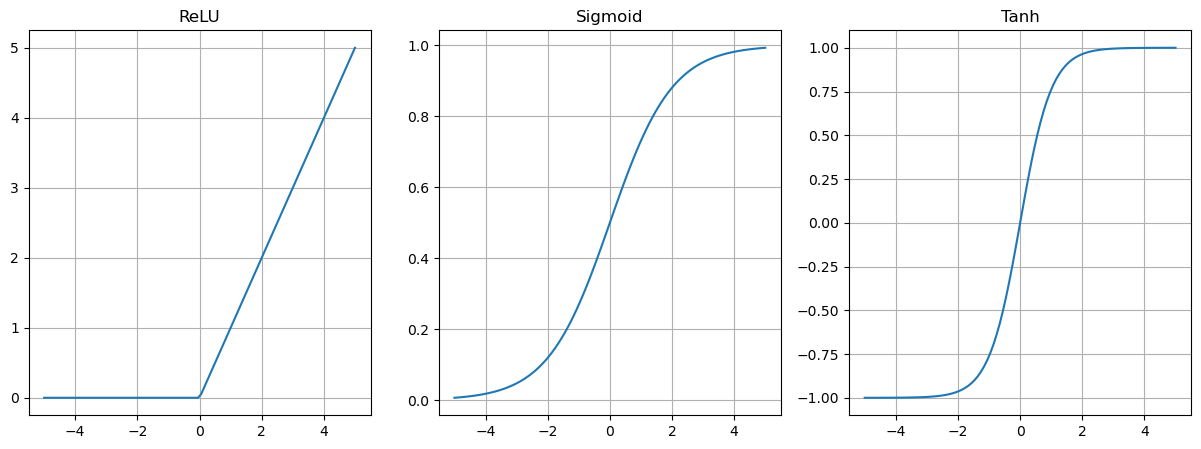

In [37]:
# Create input values
x = torch.linspace(-5, 5, 100)

# Common activation functions
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()

# Plot activation functions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x.numpy(), relu(x).numpy())
plt.title('ReLU')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x.numpy(), sigmoid(x).numpy())
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x.numpy(), tanh(x).numpy())
plt.title('Tanh')
plt.grid(True)

plt.show()

## `nn.Module`

`nn.Module` is the foundational building block in PyTorch's neural network architecture. It automatically manages parameters, enables modular design, and handles training mechanics. When creating a neural network class that inherits from `nn.Module`, you must initialize the parent class, define layers as attributes, and implement a `forward` method that specifies how data flows through your network.

Here's a simple neural network implementation that performs binary classification on points in a 2D space:

In [72]:
from torch import nn


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 8)    # Input -> Hidden
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)    # Hidden -> Output
        self.activation2 = nn.Sigmoid()   # For binary classification

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation2(x)
        return x

In [73]:
simple_nn = SimpleNN()
simple_nn

SimpleNN(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (activation1): ReLU()
  (layer2): Linear(in_features=8, out_features=1, bias=True)
  (activation2): Sigmoid()
)

In [75]:
simple_nn(torch.tensor([[1.0, 2.0]]))

tensor([[0.6329]], grad_fn=<SigmoidBackward0>)

The network processes input through two linear layers with activations. The first layer transforms 2D input into 8 features using ReLU activation, while the second layer produces a single output transformed by Sigmoid for binary classification. This structure can learn to classify points based on their position in 2D space.

Let us train this neural network by using the following data. We will generate a circular pattern dataset and train the network to classify the points as inside or outside the circle.

In [76]:
# Generate circular pattern dataset
X = torch.randn(1000, 2)
y = ((X[:, 0]**2 + X[:, 1]**2) < 2).float().reshape(-1, 1)

Using the `SimpleNN` class we defined earlier, we can now train the network.

In [77]:
# Setup training
model = SimpleNN()
criterion = nn.BCELoss() # We will learn more about loss functions later
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # We will learn more about optimizers later

# Training loop
for epoch in range(100):
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Let us visualize the decision boundary of the network.

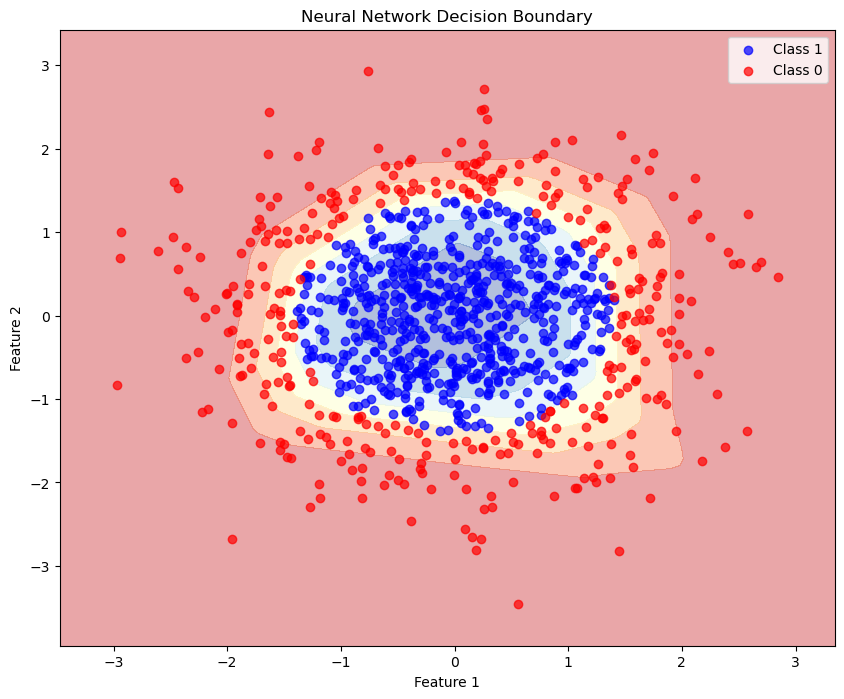

In [78]:
# Create a mesh grid of points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

# Convert grid points to PyTorch tensor
grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Get predictions
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    Z = model(grid_points)
    Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot decision boundary
plt.contourf(xx, yy, Z.numpy(), alpha=0.4, cmap='RdYlBu')

# Plot training points
plt.scatter(X[:, 0][y.squeeze() == 1], X[:, 1][y.squeeze() == 1],
           c='blue', label='Class 1', alpha=0.7)
plt.scatter(X[:, 0][y.squeeze() == 0], X[:, 1][y.squeeze() == 0],
           c='red', label='Class 0', alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundary')
plt.legend()
plt.show()

## Loss Functions

When training a neural network, we need to measure how well the network is performing. We do this by using a loss function. The loss function takes the predicted output of the network and the true output, and returns a single number that represents the error of the network. PyTorch provides many loss functions. Here are some common ones:

- `nn.MSELoss`: [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
- `nn.CrossEntropyLoss`: [Cross Entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
- `nn.BCELoss`: [Binary Cross Entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)

The choice of loss function depends on the type of problem you are trying to solve. For example, if you are doing classification, you will use a loss function that is appropriate for classification. If you are doing regression, you will use a loss function that is appropriate for regression.

## Optimizers

Optimizers are used to update the parameters of the network. PyTorch provides many optimizers. Here are some common ones:

- `torch.optim.SGD`: [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)
- `torch.optim.Adam`: [Adaptive Moment Estimation](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)
- `torch.optim.AdamW`: [Adam with Weight Decay](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html)

An optimizer takes the parameters of the network and updates them. For example, the Adam optimizer updates the parameters by adding the gradient of the loss function with respect to the parameters.

In [44]:
model = SimpleNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lr is the learning rate
optimizer.step() # This updates the parameters

# Data pipeline

Data pipeline is the process of loading, preprocessing, and splitting data into training, validation, and test sets.
The efficiency of the data pipeline is crucial for the performance of the network.
PyTorch provides a high-level interface for creating a data pipeline using the `Dataset` and `DataLoader` classes.

## Dataset

A `Dataset` is an abstract class that represents a dataset. It is the base class for all datasets in PyTorch. A convenient way to create a dataset is to use the `TensorDataset` class, which is a subclass of `Dataset`.

In [45]:
from torch.utils.data import TensorDataset

# Example usage
features = torch.randn(1000, 3)  # 1000 houses with 3 features each
prices = torch.randn(1000, 1)    # corresponding prices

dataset = TensorDataset(features, prices)

where `features` and `prices` are PyTorch tensors. The data can be retrieved by

In [81]:
print(dataset[1:3])

(tensor([[1.4044e+00, 2.3094e-01, 2.4417e-01],
        [4.1379e-01, 6.4808e-04, 1.1189e+00]]), tensor([[1.1753],
        [0.0189]]))


You can also get the length of the dataset by

In [83]:
print(len(dataset))

1000


When working with complex datasets, you might want to create a custom dataset.

This can be done by subclassing the `Dataset` class.

In [84]:
from torch.utils.data import Dataset
import torch

class HousingDataset(Dataset):
    def __init__(self, features, prices):
        self.features = features
        self.prices = prices

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.prices[idx]

dataset = HousingDataset(features, prices)

- The `__init__` function initializes the dataset by storing the input features and prices. Think of this as setting up your data container when you first create it.
- The `__len__` function returns the total number of samples in your dataset - PyTorch needs this to know how many samples are available.
- The `__getitem__` function is called when you request a specific data point using an index. It returns a tuple of (feature, price) for the house at that index.

## DataLoader

The DataLoader class comes with several important parameters that control how data is loaded during training:

In [86]:
from torch.utils.data import DataLoader

# Create data loader with detailed parameters
batch_size = 300
train_loader = DataLoader(
    dataset=dataset,          # your dataset instance
    batch_size=batch_size,    # how many samples per batch
    shuffle=True,             # randomly shuffle data
    drop_last=True,          # keep incomplete final batch
    pin_memory=True          # faster data transfer to GPU
)

# Example of accessing batches
for batch_idx, (batch_features, batch_prices) in enumerate(train_loader):
    # batch_idx gives you the batch number
    # batch_features and batch_prices are your data
    print(f"Batch {batch_idx}: Features shape {batch_features.shape}")

Batch 0: Features shape torch.Size([300, 3])
Batch 1: Features shape torch.Size([300, 3])
Batch 2: Features shape torch.Size([300, 3])


The DataLoader's parameters serve specific purposes: `batch_size` determines how many samples are processed at once, `shuffle` randomizes data order each epoch to prevent learning order-dependent patterns, `num_workers` enables parallel data loading for better performance, `drop_last` decides whether to keep partial batches at the end, and `pin_memory` optimizes data transfer to GPU if you're using one. When you iterate over the DataLoader, it automatically handles creating these batches and loading them efficiently.

## Example of Moon Dataset

First, let's create a proper data pipeline using PyTorch's dataset and dataloader classes:

In [87]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons
import numpy as np

# Create a custom dataset
class MoonDataset(Dataset):
    def __init__(self, n_samples=1000):
        # Generate the moon dataset
        X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and validation datasets
train_dataset = MoonDataset(n_samples=1000)
val_dataset = MoonDataset(n_samples=200)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

We will now implement a simple neural network to classify the moon dataset.

In [88]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin_1 = nn.Linear(2, 16)
        self.relu_1 = nn.ReLU()
        self.lin_2 = nn.Linear(16, 16)
        self.relu_2 = nn.ReLU()
        self.lin_3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.lin_1(x)
        x = self.relu_1(x)
        x = self.lin_2(x)
        x = self.relu_2(x)
        x = self.lin_3(x)
        x = self.sigmoid(x)
        return x

model = BinaryClassifier()

Using device: cpu


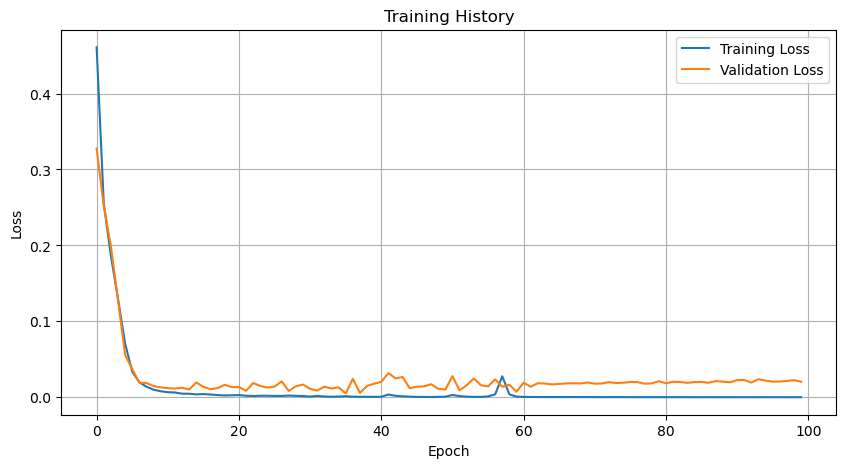

In [89]:

def train_model(model, train_loader, val_loader, criterion, optimizer,
                n_epochs=100, device='cpu'):
    # Training history
    train_losses = []
    val_losses = []

    # Transfer model to device (CPU/GPU)
    model = model.to(device)

    for epoch in range(n_epochs):
        # Training phase
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            # Move batch to device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation phase
        val_loss = 0.0
        with torch.no_grad():  # No need to track gradients
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        # Record losses
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

# Initialize model, criterion, and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Train the model
train_losses, val_losses = train_model(
    model, train_loader, val_loader, criterion, optimizer,
    n_epochs=100, device=device
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

Evaluate the model by plotting the decision boundary.

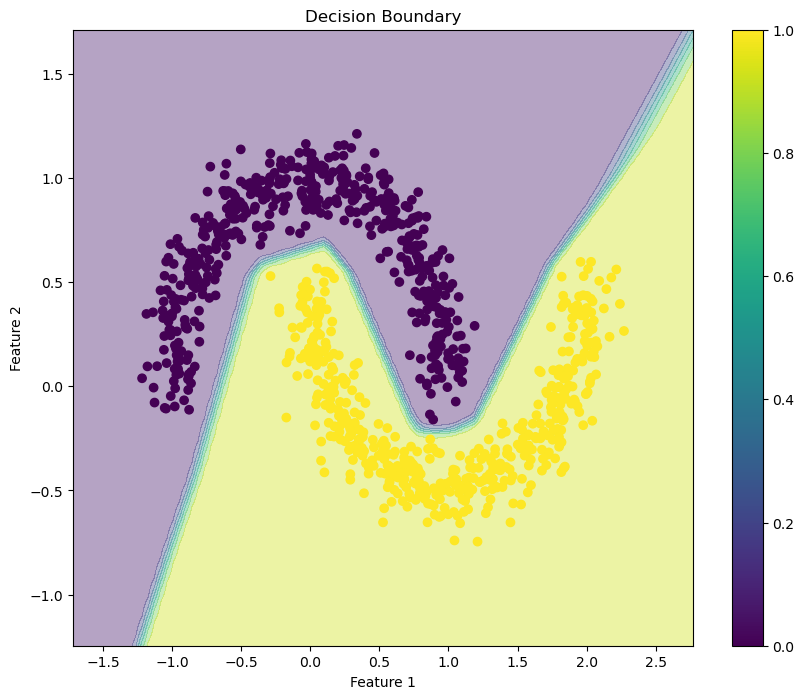

In [90]:
def plot_decision_boundary(model, X, y):
    model.eval()

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Make predictions
    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z.numpy(), alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Visualize the decision boundary
X, y = train_dataset.X, train_dataset.y
plot_decision_boundary(model, X, y)

# PyTorch Lightning

PyTorch Lightning is a high-level library for PyTorch that provides a more user-friendly interface for training and evaluating models. It provides a number of features that make it easier to train and evaluate models, such as automatic mixed precision, gradient accumulation, and early stopping.

To use PyTorch Lightning, you need to install it. (Uncomment the following line to install it.)

In [54]:
# !pip install pytorch-lightning

Now, let's re-implement the previous example using PyTorch Lightning.
With PyTorch Lightning, we will define a model by subclassing the `LightningModule` class, instead of `nn.Module`. This module will contain the model definition (`__init__` and `forward`), the training loop (`training_step`), the validation loop (`validation_step`), and the optimizer (`configure_optimizers`).


In [91]:
import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer

class BinaryClassifier(LightningModule):
    def __init__(self):
        super().__init__()
        self.lin_1 = nn.Linear(2, 16)
        self.relu_1 = nn.ReLU()
        self.lin_2 = nn.Linear(16, 16)
        self.relu_2 = nn.ReLU()
        self.lin_3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.lin_1(x)
        x = self.relu_1(x)
        x = self.lin_2(x)
        x = self.relu_2(x)
        x = self.lin_3(x)
        x = self.sigmoid(x)
        return x

    def training_step(self, batch, batch_idx):
        X, y = batch
        y_pred = self(X)
        loss = nn.BCELoss()(y_pred, y)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        X, y = batch
        y_pred = self(X)
        loss = nn.BCELoss()(y_pred, y)
        self.log('val_loss', loss)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.01)

A key feature of PyTorch Lightning is that it provides a `Trainer` class that handles the training loop.

In [92]:
model = BinaryClassifier()
trainer = Trainer(max_epochs=50)
trainer.fit(model, train_loader, val_loader) # This will automatically handle the training loop

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | lin_1   | Linear  | 48     | train
1 | relu_1  | ReLU    | 0      | train
2 | lin_2   | Linear  | 272    | train
3 | relu_2  | ReLU    | 0      | train
4 | lin_3   | Linear  | 17     | train
5 | sigmoid | Sigmoid | 0      | train
--------------------------------------------
337       Trainable params
0         Non-trainable params
337       Total params
0.001     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


Now, let's evaluate the model.

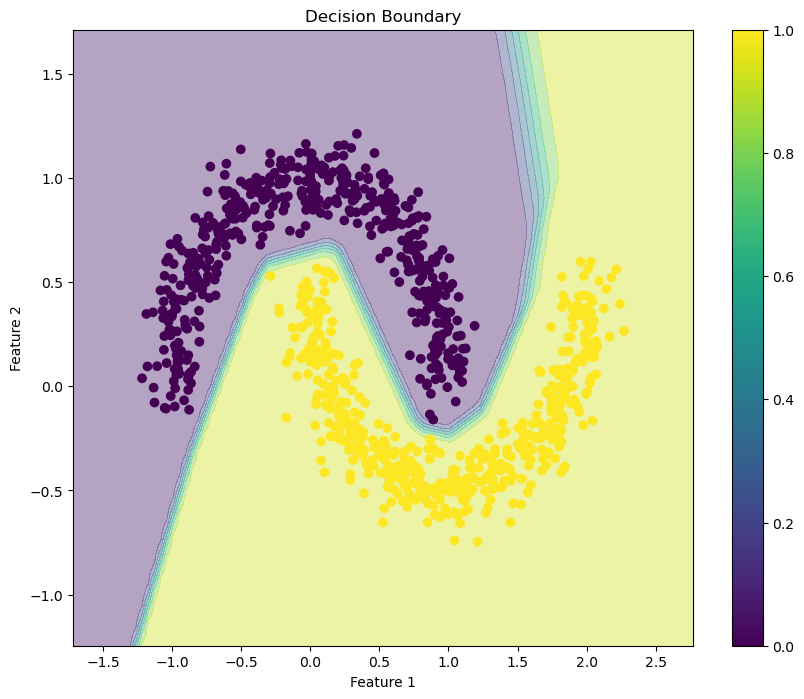

In [93]:
# Visualize the decision boundary
X, y = train_dataset.X, train_dataset.y
plot_decision_boundary(model, X, y)

A cool feature of PyTorch Lightning is that it provides a `TensorBoard` callback that allows you to visualize the training process.

To use this, you need to install the `tensorboard` package. (Uncomment the following line to install it.)

In [58]:
# !pip install tensorboard

In [94]:
%load_ext tensorboard
%tensorboard  --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 75158), started 2 days, 3:51:53 ago. (Use '!kill 75158' to kill it.)


Then, you can run the following command to start the TensorBoard server.
%load_ext tensorboard

In [95]:
from pytorch_lightning.loggers import TensorBoardLogger

model = BinaryClassifier()
logger = TensorBoardLogger(save_dir='logs')
trainer = Trainer(logger=logger, max_epochs=100, log_every_n_steps=1)
trainer.fit(model, train_loader, val_loader)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | lin_1   | Linear  | 48     | train
1 | relu_1  | ReLU    | 0      | train
2 | lin_2   | Linear  | 272    | train
3 | relu_2  | ReLU    | 0      | train
4 | lin_3   | Linear  | 17     | train
5 | sigmoid | Sigmoid | 0      | train
--------------------------------------------
337       Trainable params
0         Non-trainable params
337       Total params
0.001     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


# References
- [\[Pytorch\] Contiguous vs Non-Contiguous Tensor / View — Understanding view(), reshape(), transpose() | by Kathryn | Analytics Vidhya | Medium](https://medium.com/analytics-vidhya/pytorch-contiguous-vs-non-contiguous-tensor-view-understanding-view-reshape-73e10cdfa0dd)
- [PyTorch Lightning](https://lightning.ai/docs/pytorch/stable/index.html)
- [TensorBoard](https://www.tensorflow.org/tensorboard)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)

